## **Prepare station data: Channel Islands**
### useful links #####
 - [markdown](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)<br>
 - [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)<br>
 - [tutorials](https://pandas.pydata.org/docs/index.html)<br>
 - [indexing selecting](https://pandas.pydata.org/docs/user_guide/indexing.html#)<br>
  - [resampling](https://saturncloud.io/blog/how-to-resample-a-pandas-dataframe-with-bin-size-or-frequency/#:~:text=In%20this%20example%2C%20we%20first,the%20string%20argument%20'D'.)

In [1]:
# Import packages

import glob

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
import scipy as sci
import scipy.io
from matplotlib.cm import get_cmap
from scipy import stats


## **Read data**

**&rarr; Santa Cruz Island**

In [2]:
# RAWS data
#  Santa Cruz Island
path = '/home/sbarc/wrf/wrf401/channel/stations/'
file = 'SNCC1.2023-09-01.csv'

# ------------------------------------------
dd   = pd.read_csv(path+file,skiprows=11)
dd


,Unnamed: 0,Unnamed: 1,Millimeters,Celsius,%,m/s,Degrees,m/s.1,volts,W/m**2,Millimeters.1,Celsius.1,m/s.2,Celsius.2,gm,Degrees.1,Celsius.3,Celsius.4,code,Celsius.5
0,SNCC1,1999-12-02T18:25:00Z,NaN,18.89,39.0,1.34,300.0,5.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.57,NaN,WNW,NaN
1,SNCC1,1999-12-02T19:25:00Z,NaN,20.00,41.0,0.46,230.0,4.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.29,NaN,SW,NaN
2,SNCC1,1999-12-02T20:25:00Z,NaN,18.89,35.0,4.48,280.0,8.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.03,NaN,W,NaN
3,SNCC1,1999-12-02T21:25:00Z,NaN,19.44,34.0,5.81,290.0,11.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.10,NaN,WNW,NaN
4,SNCC1,1999-12-02T22:25:00Z,NaN,19.44,36.0,5.35,290.0,11.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.91,NaN,WNW,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194219,SNCC1,2023-08-31T19:13:00Z,NaN,25.00,63.0,1.79,165.0,4.47,13.4,857.0,773.43,NaN,4.47,36.67,7.9,113.0,17.45,NaN,SSE,NaN
194220,SNCC1,2023-08-31T20:13:00Z,NaN,25.56,61.0,1.34,227.0,4.47,13.3,906.0,773.43,NaN,4.47,37.78,7.5,138.0,17.47,NaN,SW,NaN
194221,SNCC1,2023-08-31T21:13:00Z,NaN,23.89,66.0,2.23,115.0,5.37,13.3,894.0,773.43,NaN,5.37,36.67,6.7,156.0,17.13,NaN,ESE,NaN
194222,SNCC1,2023-08-31T22:13:00Z,NaN,25.56,56.0,1.79,18.0,6.26,13.3,764.0,773.43,NaN,6.26,38.89,6.4,64.0,16.12,NaN,NNE,NaN


**&rarr; Santa Rosa Island**

In [27]:
# RAWS data
#  Santa Rosa Island
path = '/home/sbarc/wrf/wrf401/channel/stations/'
file = 'SRIC1.2023-09-01.csv'

# ------------------------------------------
dd   = pd.read_csv(path+file,skiprows=11)
dd


,Unnamed: 0,Unnamed: 1,Millimeters,Celsius,%,m/s,Degrees,m/s.1,volts,W/m**2,Millimeters.1,Celsius.1,m/s.2,Celsius.2,gm,Degrees.1,Celsius.3,Celsius.4,code,Celsius.5
0,SRIC1,1999-12-02T18:20:00Z,NaN,8.89,75.0,15.18,130.0,20.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.65,-4.48,SE,NaN
1,SRIC1,1999-12-02T19:20:00Z,NaN,8.89,70.0,12.09,130.0,21.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.66,-2.85,SE,NaN
2,SRIC1,1999-12-02T20:20:00Z,NaN,9.44,76.0,15.18,120.0,21.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.38,-3.80,ESE,NaN
3,SRIC1,1999-12-02T21:20:00Z,NaN,9.44,84.0,14.30,120.0,22.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.84,-3.37,ESE,NaN
4,SRIC1,1999-12-02T22:20:00Z,NaN,9.44,74.0,16.10,130.0,22.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.99,-4.23,SE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200243,SRIC1,2023-08-31T19:13:00Z,NaN,21.67,64.0,3.58,291.0,5.37,13.3,924.0,556.26,NaN,5.37,33.33,8.4,290.0,14.53,NaN,WNW,NaN
200244,SRIC1,2023-08-31T20:13:00Z,NaN,20.00,69.0,4.02,281.0,6.70,13.4,975.0,556.26,NaN,6.70,32.78,7.5,276.0,14.11,NaN,W,NaN
200245,SRIC1,2023-08-31T21:13:00Z,NaN,19.44,73.0,4.47,282.0,8.05,13.4,964.0,556.26,NaN,8.05,30.56,7.4,279.0,14.44,NaN,WNW,NaN
200246,SRIC1,2023-08-31T22:13:00Z,NaN,18.89,74.0,4.02,267.0,7.15,14.0,885.0,556.26,NaN,7.15,30.00,7.2,274.0,14.12,NaN,W,NaN


### **Rearrange data**

In [7]:
#  Note: time stamp is in a column here
#  to resample data, time stamp is set as an index

#  grab time and convert to PST time
xtime  = pd.DataFrame({'Time (PST)':pd.to_datetime(dd.iloc[:,1],utc=True)})
xtime  = xtime['Time (PST)'].dt.tz_convert('US/Pacific')
# create dictionary
data = {'time (PST)':xtime,
        'air temperature (C)':dd.iloc[:,3],
        'relative humidity (%)':dd.iloc[:,4],
        'wind speed (m/s)':dd.iloc[:,5],
        'wind direction (deg)':dd.iloc[:,6],
        'wind gust (m/s)':dd.iloc[:,7]}
# create data frame
disl = pd.DataFrame(data)
disl


,time (PST),air temperature (C),relative humidity (%),wind speed (m/s),wind direction (deg),wind gust (m/s)
0,1999-12-02 10:25:00-08:00,18.89,39.0,1.34,300.0,5.81
1,1999-12-02 11:25:00-08:00,20.00,41.0,0.46,230.0,4.01
2,1999-12-02 12:25:00-08:00,18.89,35.0,4.48,280.0,8.03
3,1999-12-02 13:25:00-08:00,19.44,34.0,5.81,290.0,11.63
4,1999-12-02 14:25:00-08:00,19.44,36.0,5.35,290.0,11.63
...,...,...,...,...,...,...
194219,2023-08-31 12:13:00-07:00,25.00,63.0,1.79,165.0,4.47
194220,2023-08-31 13:13:00-07:00,25.56,61.0,1.34,227.0,4.47
194221,2023-08-31 14:13:00-07:00,23.89,66.0,2.23,115.0,5.37
194222,2023-08-31 15:13:00-07:00,25.56,56.0,1.79,18.0,6.26


In [8]:
disl.columns

Index(['time (PST)', 'air temperature (C)', 'relative humidity (%)',
       'wind speed (m/s)', 'wind direction (deg)', 'wind gust (m/s)'],
      dtype='object')

### **Add attributes to dataframe**


In [9]:
#  Santa Cruz Island
disl.attrs['Description'] ='RAWS station: Santa Cruz Island'
disl.attrs['Code']        = 'SNCC1'
disl.attrs['Latitude']    = 33.992981
disl.attrs['Longitude']   = -119.716264
disl.attrs['Elevation m'] = 89.0

print (disl.attrs)

{'Description': 'RAWS station: Santa Cruz Island', 'Code': 'SNCC1', 'Latitude': 33.992981, 'Longitude': -119.716264, 'Elevation m': 89.0}


In [30]:
#  Santa Rosa Island
disl.attrs['Description'] ='RAWS station: Santa Rosa Island'
disl.attrs['Code']        = 'SNCC1'
disl.attrs['Latitude']    =  33.978686
disl.attrs['Longitude']   = -120.078778
disl.attrs['Elevation m'] = 391.3 

print (disl.attrs)

{'Description': 'RAWS station: Santa Rosa Island', 'Code': 'SNCC1', 'Latitude': 33.978686, 'Longitude': -120.078778, 'Elevation m': 391.3}


In [31]:
#   extract attributes as floating number

latitude  = disl.attrs['Latitude']
longitude = disl.attrs['Longitude']
elevation = disl.attrs['Elevation m']
type(latitude),type(longitude),type(elevation)


(float, float, float)

## **Check Temperature data**

In [10]:
# check statistics for each variable
dairt = disl.iloc[:,0:2]
dairt.describe()



,air temperature (C)
count,193616.000000
mean,15.775441
std,6.283822
min,-10.720000
25%,11.110000
50%,15.000000
75%,20.000000
max,47.780000


<AxesSubplot:>

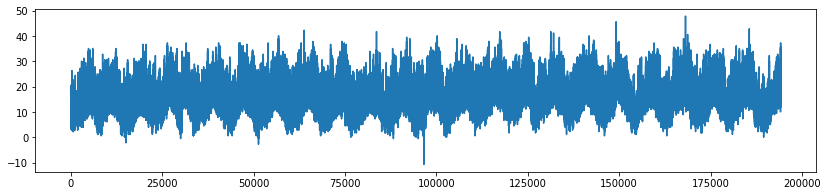

In [11]:
# Check air temperature

plt.figure(figsize=[14,3])
dairt.iloc[:,1].plot()


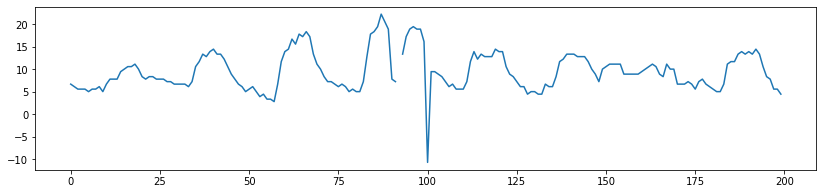

In [12]:
# inspect minimum outlier

tmp = dairt.iloc[:,1].to_numpy()
i   = np.where(tmp < -5.)
i   = i[0]
i   = i.item()

plt.figure(figsize=[14,3])
plt.plot(tmp[i-100:i+100])


In [13]:
# suspicious value!
# put NAN value in dataframe
dairt.iloc[i,1] = np.nan



In [15]:
i = np.where((x >2) & (x<5))
#i = np.argwhere(np.where(x > 2,x, x<5))
#i = np.squeeze(i)


NameError: name 'x' is not defined

In [36]:
# inspect maximum outlier    - SRI

tmp = dairt.iloc[:,1].to_numpy()
i   = np.argwhere(tmp > 45.)
i = np.squeeze(i)
i

#i   = i[0]
#i   = i[0].item()
# put NAN value in dataframe
dairt.iloc[i,1] = np.nan
#plt.figure(figsize=[14,3])
#plt.plot(tmp[i-100:i+100])

# It looks okay - leave it

In [37]:
# recheck statistics

dairt.describe()
dairt.columns


Index(['time (PST)', 'air temperature (C)'], dtype='object')

<AxesSubplot:>

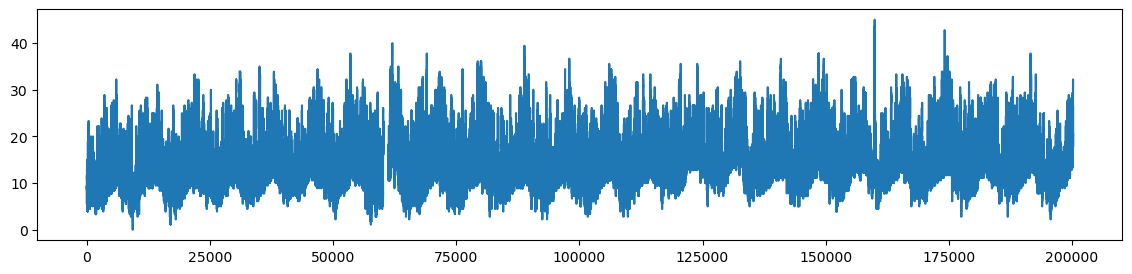

In [38]:
# Check air temperature

plt.figure(figsize=[14,3])
dairt.iloc[:,1].plot()


## **Resample to daily means and max**

In [39]:
# Set the index of the DataFrame to the time column
dairt.set_index('time (PST)', inplace=True)
dairt.columns



Index(['air temperature (C)'], dtype='object')

In [40]:
dairt

,air temperature (C)
time (PST),
1999-12-02 10:20:00-08:00,8.89
1999-12-02 11:20:00-08:00,8.89
1999-12-02 12:20:00-08:00,9.44
1999-12-02 13:20:00-08:00,9.44
1999-12-02 14:20:00-08:00,9.44
...,...
2023-08-31 12:13:00-07:00,21.67
2023-08-31 13:13:00-07:00,20.00
2023-08-31 14:13:00-07:00,19.44


In [41]:
# Resample the DataFrame to daily data
dairt_dly = dairt.resample('D').mean()
dairt_dly

,air temperature (C)
time (PST),
1999-12-02 00:00:00-08:00,7.935714
1999-12-03 00:00:00-08:00,8.588750
1999-12-04 00:00:00-08:00,11.434167
1999-12-05 00:00:00-08:00,10.555833
1999-12-06 00:00:00-08:00,8.496250
...,...
2023-08-27 00:00:00-07:00,18.750000
2023-08-28 00:00:00-07:00,22.986250
2023-08-29 00:00:00-07:00,17.037917


In [42]:
# Resample the DataFrame to daily max
dairt_max = dairt.resample('D').max()
dairt_max

,air temperature (C)
time (PST),
1999-12-02 00:00:00-08:00,9.44
1999-12-03 00:00:00-08:00,11.67
1999-12-04 00:00:00-08:00,15.00
1999-12-05 00:00:00-08:00,15.00
1999-12-06 00:00:00-08:00,13.33
...,...
2023-08-27 00:00:00-07:00,29.44
2023-08-28 00:00:00-07:00,28.89
2023-08-29 00:00:00-07:00,21.67


## **Resample to monthly means and max**

In [45]:

# Resample the DataFrame to monthly mean and max
dairt_monmean = dairt.resample('M').mean()
dairt_monmax  = dairt.resample('M').max()
dairt_monmean


,air temperature (C)
time (PST),
1999-12-31 00:00:00-08:00,12.098864
2000-01-31 00:00:00-08:00,9.107523
2000-02-29 00:00:00-08:00,8.571346
2000-03-31 00:00:00-08:00,8.679459
2000-04-30 00:00:00-07:00,9.477880
...,...
2023-04-30 00:00:00-07:00,10.137208
2023-05-31 00:00:00-07:00,10.922197
2023-06-30 00:00:00-07:00,12.218625


<AxesSubplot:title={'center':'Monthly Mean'}, xlabel='time (PST)'>

<Figure size 3500x200 with 0 Axes>

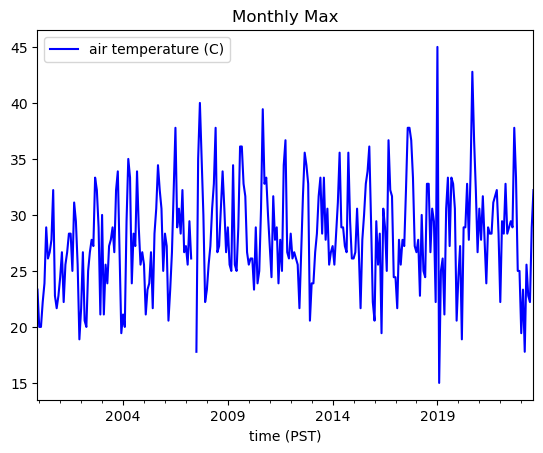

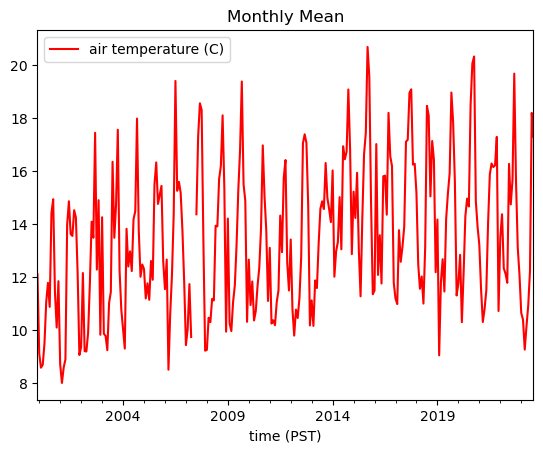

In [46]:
# Check air temperature

plt.figure(figsize=[35,2])
dairt_monmax.plot(color='blue',title='Monthly Max')
dairt_monmean.plot(color='red',title='Monthly Mean')


---
## Save clean monthly data

In [ ]:
#    SCI

path     =  '/home/sbarc/wrf/wrf401/channel/stations/'
file     =  'SCI.monthly.pkl'
dssci    = dairt_monmean
dssci.to_pickle(path + file)



In [47]:
#    SRI

path     =  '/home/sbarc/wrf/wrf401/channel/stations/'
file     =  'SRI.monthly.pkl'
dssci    = dairt_monmean
dssci.to_pickle(path + file)



In [ ]:
PANDAS
*** Save panda dataframe as pkl
path    = '/home/saturn-models/labfees/sce/collated/2022/'
fileout = 'SCE-Temperature-2022-complete.pkl'
dpat.to_pickle(path + fileout)

*** Read as pikle
filein = '/home/saturn-models/labfees/sce/collated/2022/SCE-Temperature-2022-complete.pkl'
ds     = pd.read_pickle(filein)
ds


In [ ]:
dssci

---
## **END**
---